# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [2]:
employees = pd.read_csv("Employee.csv")

employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1 - with groupby()

employees[["Department","Salary"]].groupby(by="Department").mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2 - with pivottable()
employees[["Department","Salary"]].pivot_table(index="Department")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
employees[["Department","Title","Salary"]].pivot_table(index=["Department","Title"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
employees[["Title","Salary","Years"]].pivot_table(index=["Title"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
employees[["Department","Title","Salary"]].pivot_table(index=["Department","Title"],aggfunc = [np.mean, 'count'] )

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
employees[["Department","Title","Salary"]].pivot_table(index=["Department","Title"], aggfunc=[np.median,np.min,np.max,np.std])

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [9]:
"""
your commments here
"""

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
test = employees[["Department","Title","Salary"]].pivot_table(index=["Department","Title"], aggfunc=[np.median,np.min,np.max,np.std]) # Pourquoi ça ne marche pas avec fill_value = 0 ?? 

test.fillna("0")

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70         0
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70         0
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60         0
Sales      associate   55.0     55     55       0.0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
employees[["Department","Salary"]].pivot_table(index="Department", aggfunc = ["count", np.sum])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [12]:
employees[["Department","Title","Years","Salary"]].pivot_table(index= ["Department","Title"], aggfunc= {"Years" : np.sum,"Salary":np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [14]:
fitbit = pd.read_csv("Fitbit.csv")

fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [15]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [16]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [17]:
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

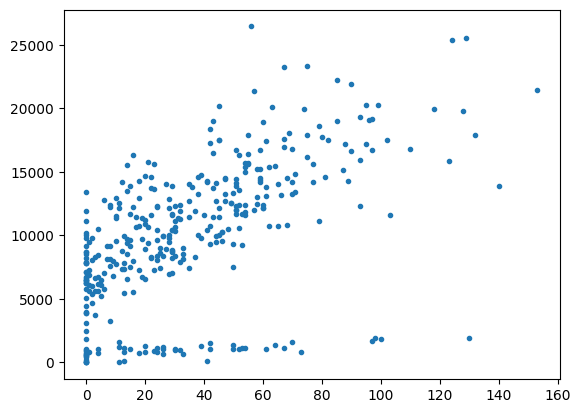

In [18]:
fig = plt.figure()
ad = fig.subplots()

ad.plot(fitbit["Minutes Very Active"], fitbit["Steps"],marker = ".", linestyle = "None")

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [19]:
"""
your commments here
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [20]:
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

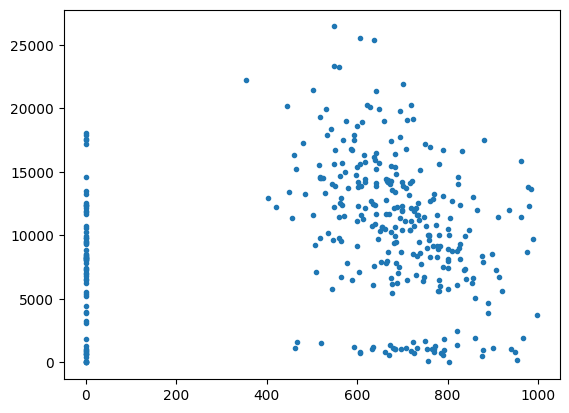

In [21]:
fig = plt.figure()
ad = fig.subplots()

ad.plot(fitbit["Minutes Sedentary"], fitbit["Steps"],marker = ".", linestyle = "None")

In [22]:
"""
your commments here
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [23]:
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

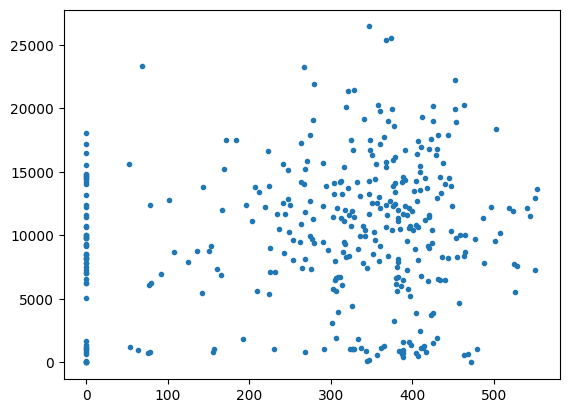

In [24]:
fig = plt.figure()
ad = fig.subplots()

ad.plot(fitbit["MinutesOfSleep"], fitbit["Steps"],marker = ".", linestyle = "None")

In [25]:
"""
your commments here
"""

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [26]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [27]:
fitbit[columns].corr().sort_values(by="Steps")

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [28]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [30]:
time_grades = pd.read_csv("Time_Grades.csv")

#### Show visually the frequency distribution of the `time_grades` dataset.

<Axes: >

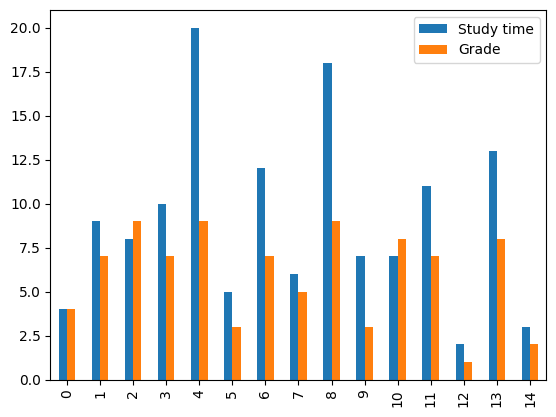

In [31]:
time_grades.plot.bar()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [32]:
time_grades["Study time"].corr(time_grades["Grade"])

0.7980456073578858

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

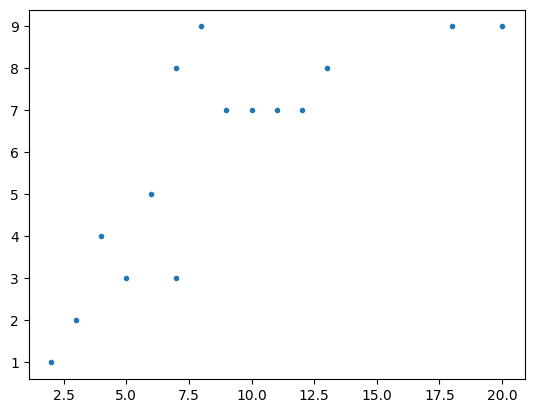

In [35]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(time_grades["Study time"],time_grades["Grade"], linestyle ="None", marker=".")

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
Pearson : correlation between values, Spearman : correlation between values' ranks"""